In [85]:
from utils import read_lab_file, read_wav_file, split_audio, split_frame, BinarySearch

In [86]:
sample_rate, signal = read_wav_file("./TinHieuHuanLuyen/44MTT.wav")

In [87]:
sample_rate

44100

In [88]:
signal

array([-36, -34,  -6, ..., -14, -11,   0], dtype=int16)

In [89]:
lab_files = read_lab_file("./TinHieuHuanLuyen/")

In [90]:
lab_files

['42FQT.lab', '44MTT.lab', '45MDV.lab', '30FTN.lab']

In [91]:
segmented_values = split_audio("./TinHieuHuanLuyen/", lab_files)
segmented_values

{'42FQT.lab': {'silence': [(0.0, 0.46),
   (0.99, 1.56),
   (2.13, 2.51),
   (2.93, 3.79),
   (4.38, 4.77),
   (5.22, 5.79)],
  'vowel': [(0.46, 0.99),
   (1.56, 2.13),
   (2.51, 2.93),
   (3.79, 4.38),
   (4.77, 5.22)]},
 '44MTT.lab': {'silence': [(0.0, 0.93),
   (1.42, 2.59),
   (3.0, 4.71),
   (5.11, 6.26),
   (6.66, 8.04),
   (8.39, 9.27)],
  'vowel': [(0.93, 1.42),
   (2.59, 3.0),
   (4.71, 5.11),
   (6.26, 6.66),
   (8.04, 8.39)]},
 '45MDV.lab': {'silence': [(0.0, 0.88),
   (1.34, 2.35),
   (2.82, 3.76),
   (4.13, 5.04),
   (5.5, 6.41),
   (6.79, 7.42)],
  'vowel': [(0.88, 1.34),
   (2.35, 2.82),
   (3.76, 4.13),
   (5.04, 5.5),
   (6.41, 6.79)]},
 '30FTN.lab': {'silence': [(0.97, 1.76),
   (2.11, 3.44),
   (3.77, 4.7),
   (5.13, 5.96),
   (6.28, 6.78)],
  'vowel': [(0.59, 0.97),
   (1.76, 2.11),
   (3.44, 3.77),
   (4.7, 5.13),
   (5.96, 6.28)]}}

In [92]:
start = segmented_values["44MTT.lab"]["silence"][0][0]
end = segmented_values["44MTT.lab"]["silence"][0][1]

print(start)
print(end)

0.0
0.93


In [93]:
frames = split_frame(signal, sample_rate, 0.3, start, end)

In [94]:
frames

[array([-36, -34,  -6, ..., -34, -25, -14], dtype=int16),
 array([-4,  0,  7, ..., 18,  8,  0], dtype=int16),
 array([ -2,  -1,   4, ..., -36, -10,   7], dtype=int16),
 array([   26,    32,    45, ..., -4517, -4948, -5221], dtype=int16)]

**STE**

In [95]:
from feature_extractor import FeatureExtractor

In [96]:
extractor = FeatureExtractor()

**Silence**

In [97]:
silence_ste = []
for key in segmented_values:
    silence_frames = []
    for i in range(len(segmented_values[key]["silence"])):
        start = segmented_values[key]["silence"][i][0]
        end = segmented_values[key]["silence"][i][1]
        frames = split_frame(signal, sample_rate, 0.03, start, end)
        for frame in frames:
            silence_frames.append(frame)
    silence_ste.append(extractor.ste(silence_frames))

In [98]:
silence_ste = []
for key in segmented_values:
    silence_frames = []
    for i in range(len(segmented_values[key]["silence"])):
        start = segmented_values[key]["silence"][i][0]
        end = segmented_values[key]["silence"][i][1]
        frames = split_frame(signal, sample_rate, 0.03, start, end)
        for frame in frames:
            silence_frames.append(frame)
    silence_ste.append(extractor.ste(silence_frames))

In [99]:
silence_ste

[0.4124300903630899,
 0.4886295276526551,
 0.3923269070945693,
 0.38080029898507095]

**ZCR**

**Silence**

In [100]:
silence_zcr = []
for key in segmented_values:
    silence_frames = []
    for i in range(len(segmented_values[key]["silence"])):
        start = segmented_values[key]["silence"][i][0]
        end = segmented_values[key]["silence"][i][1]
        frames = split_frame(signal, sample_rate, 0.03, start, end)
        for frame in frames:
            silence_frames.append(frame)
    silence_zcr.append(extractor.zcr(silence_frames))

In [101]:
silence_zcr

[0.5781484570475397,
 0.5660781367392937,
 0.6509243794275182,
 0.6231660231660232]

**MA**

In [102]:
silence_ma = []
for key in segmented_values:
    silence_frames = []
    for i in range(len(segmented_values[key]["silence"])):
        start = segmented_values[key]["silence"][i][0]
        end = segmented_values[key]["silence"][i][1]
        frames = split_frame(signal, sample_rate, 0.03, start, end)
        for frame in frames:
            silence_frames.append(frame)
    silence_ma.append(extractor.ma(silence_frames,is_statistic= True))

In [103]:
silence_ma

[0.09871903217499813,
 0.16590853755624008,
 0.08885593289944024,
 0.1503090274210585]

**vowel**

**ste**



In [104]:
vowel_ste = []
for key in segmented_values:
    silence_frames = []
    for i in range(len(segmented_values[key]["vowel"])):
        start = segmented_values[key]["vowel"][i][0]
        end = segmented_values[key]["vowel"][i][1]
        frames = split_frame(signal, sample_rate, 0.03, start, end)
        for frame in frames:
            silence_frames.append(frame)
    vowel_ste.append(extractor.ste(silence_frames))

vowel_ste
    

[0.4338125864650781,
 0.19523467198225866,
 0.4040037007553553,
 0.3561229155538656]

**zcr**

In [105]:
vowel_zcr = []
for key in segmented_values:
    silence_frames = []
    for i in range(len(segmented_values[key]["vowel"])):
        start = segmented_values[key]["vowel"][i][0]
        end = segmented_values[key]["vowel"][i][1]
        frames = split_frame(signal, sample_rate, 0.03, start, end)
        for frame in frames:
            silence_frames.append(frame)
    vowel_zcr.append(extractor.zcr(silence_frames))

vowel_zcr

[0.5847493627867458, 0.5867203219315895, 0.6144144144144144, 0.62869623655914]

**Ma**

In [106]:
vowel_ma = []
for key in segmented_values:
    silence_frames = []
    for i in range(len(segmented_values[key]["vowel"])):
        start = segmented_values[key]["vowel"][i][0]
        end = segmented_values[key]["vowel"][i][1]
        frames = split_frame(signal, sample_rate, 0.03, start, end)
        for frame in frames:
            silence_frames.append(frame)
    vowel_ma.append(extractor.ma(silence_frames, is_statistic = True))

vowel_ma

[0.1999806231263597,
 0.4599600713009592,
 0.23022254435115735,
 0.18561159138738811]

In [110]:
import pandas as pb

ModuleNotFoundError: No module named 'pandas'

In [108]:
ste = {"silence": [], "vowel" : []}
ste["silence"] = silence_ste
ste["vowel"] = vowel_ste

ste_df = pd.DataFrame(ste)
ste_df.to_csv("./Ste.csv", index=False)

NameError: name 'pd' is not defined

In [ ]:
zcr = {"silence": [], "vowel" : []}
zcr["silence"] = silence_zcr
zcr["vowel"] = vowel_zcr

zcr_df = pd.DataFrame(zcr)
zcr_df.to_csv("./Zcr.csv", index=False)

In [ ]:
ma = {"silence": [], "vowel" : []}
ma["silence"] = silence_ma
ma["vowel"] = vowel_ma

ma_df = pd.DataFrame(ma)
ma_df.to_csv("./Ma.csv", index=False)

In [ ]:
threshold = BinarySearch(min(silence_ma), max(vowel_ma), silence_ma, vowel_ma)

In [ ]:
threshold

0.18163196749981997

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sample_rate, signal = read_wav_file('./TinHieuHuanLuyen/30FTN.wav')

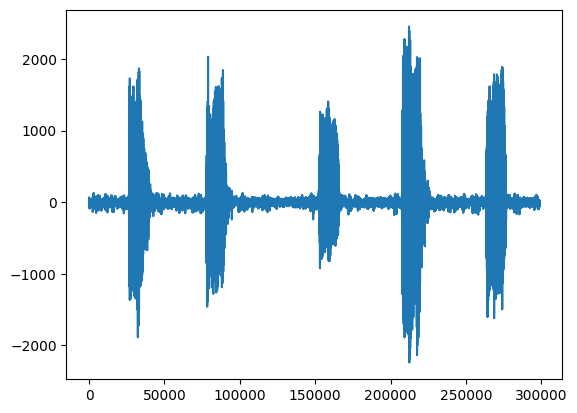

In [ ]:
plt.plot(np.arange(len(signal)), signal)

In [ ]:
len(signal)

299037

In [ ]:
0.03 * sample_rate

1323.0

In [ ]:
len(signal) / (0.03 * sample_rate)

226.02947845804988